# Model for classification of triangles vs. squares

### Settings

In [1]:
# Imports
import warnings
warnings.simplefilter('ignore')

import numpy as np
from numpy import load
import os.path
import matplotlib.pyplot as plt

import keras.backend as K
if(K.tensorflow_backend):
    import tensorflow as tf
    tf.logging.set_verbosity(tf.logging.ERROR)
from keras.utils import np_utils
from keras.models import load_model

from code import shape_images as shi
from code import model as mod

Using TensorFlow backend.


### Loading of pre-generated data

In [2]:
# filenames
# data paths
original_data_path = "/home/elena/eStep/XAI/Data/TrianglesAndSquaresRotationScale"

train_data_fname = os.path.join(original_data_path, 'split_npz','train_data.npz')
test_data_fname = os.path.join(original_data_path, 'split_npz','test_data.npz')
val_data_fname = os.path.join(original_data_path, 'split_npz','validation_data.npz')

# loading
train_data = np.load(train_data_fname)
test_data = np.load(test_data_fname)
val_data = np.load(val_data_fname)


In [3]:
images_train = train_data['images_train']
labels_train = train_data['labels_train']
images_test = test_data['images_test']
labels_test = test_data['labels_test']
images_val = val_data['images_val']
labels_val = val_data['labels_val']

print("Size of training data: ", np.shape(images_train), "and labels: ", np.shape(labels_train))
print("Size of validation data: ", np.shape(images_val), "and labels: ", np.shape(labels_val))
print("Size of testing data: ", np.shape(images_test), "and labels: ", np.shape(labels_test))

Size of training data:  (14000, 4096) and labels:  (14000,)
Size of validation data:  (4000, 4096) and labels:  (4000,)
Size of testing data:  (2000, 4096) and labels:  (2000,)


#### Images formatting

In [4]:
img_rows = 64
img_cols = 64
#print(K.image_data_format())
if K.image_data_format() == 'channels_first':
    images_train = images_train.reshape(images_train.shape[0], 1, img_rows, img_cols)
    images_test = images_test.reshape(images_test.shape[0], 1, img_rows, img_cols)
    images_val = images_val.reshape(images_val.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    images_train = images_train.reshape(images_train.shape[0], img_rows, img_cols, 1)
    images_test = images_test.reshape(images_test.shape[0], img_rows, img_cols, 1)
    images_val = images_val.reshape(images_val.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
print("Size of training data: ", np.shape(images_train))
print("Size of validation data: ", np.shape(images_val))
print("Size of testing data: ", np.shape(images_test))

Size of training data:  (14000, 64, 64, 1)
Size of validation data:  (4000, 64, 64, 1)
Size of testing data:  (2000, 64, 64, 1)


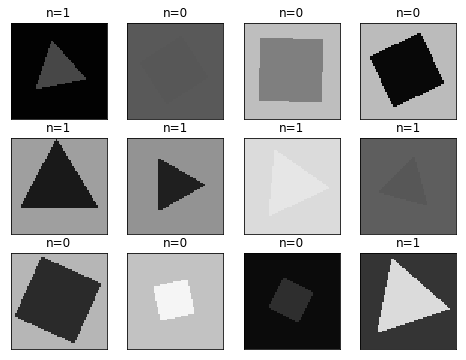

In [5]:
# plot 12 random train images
shi.plot_12images(images_train, labels_train) 

#### Labels formatting

In [6]:
# convert class vectors to binary class matrices
labels_train = np_utils.to_categorical(labels_train, num_classes=2)
labels_test = np_utils.to_categorical(labels_test, num_classes=2)
labels_val = np_utils.to_categorical(labels_val, num_classes=2)
print(labels_train)
print('labels_train shape:', labels_train.shape)
print('labels_test shape:', labels_test.shape)
print('labels_val shape:', labels_val.shape)

[[0. 1.]
 [0. 1.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [0. 1.]]
labels_train shape: (14000, 2)
labels_test shape: (2000, 2)
labels_val shape: (4000, 2)


## CNN model

In [7]:
# parameters of the training
batch_size = 200
epochs = 5
num_classes = 2

In [8]:
# generate the model
model = mod.generate_model(input_shape, num_classes)

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_layer1 (Conv2D)       (None, 62, 62, 64)        640       
_________________________________________________________________
conv2d_layer2 (Conv2D)       (None, 60, 60, 128)       73856     
_________________________________________________________________
maxpooling2d_layer1 (MaxPool (None, 30, 30, 128)       0         
_________________________________________________________________
dropout_layer1 (Dropout)     (None, 30, 30, 128)       0         
_________________________________________________________________
flatten_layer1 (Flatten)     (None, 115200)            0         
_________________________________________________________________
dense_layer1 (Dense)         (None, 256)               29491456  
_________________________________________________________________
dropout_layer2 (Dropout)     (None, 256)               0         
__________

In [9]:
# train 
mod.train_model(model, images_train, labels_train, images_val, labels_val, batch_size, epochs)

Train on 14000 samples, validate on 4000 samples
Epoch 1/5
14000/14000 [==============================] - 375s 27ms/step - loss: 0.6864 - acc: 0.5933 - val_loss: 0.5620 - val_acc: 0.7013
Epoch 2/5
14000/14000 [==============================] - 440s 31ms/step - loss: 0.4450 - acc: 0.7868 - val_loss: 0.2603 - val_acc: 0.8937
Epoch 3/5
14000/14000 [==============================] - 412s 29ms/step - loss: 0.2600 - acc: 0.9025 - val_loss: 0.1049 - val_acc: 0.9685
Epoch 4/5
14000/14000 [==============================] - 411s 29ms/step - loss: 0.1126 - acc: 0.9588 - val_loss: 0.0878 - val_acc: 0.9632
Epoch 5/5
14000/14000 [==============================] - 408s 29ms/step - loss: 0.0776 - acc: 0.9724 - val_loss: 0.1317 - val_acc: 0.9320


### Save the model

In [10]:
# filename for model saving
model_fname = os.path.join(original_data_path, 'Model','model.h5')

In [ ]:
# save the trained model
model.save(model_fname)
print("Saved model to disk")